Total number of users (tnu): 50
Total number of items (tni): 30
Number of ratings per item:
Item_1     48
Item_2     45
Item_3     50
Item_4     49
Item_5     50
Item_6     50
Item_7     50
Item_8     50
Item_9     49
Item_10    48
Item_11    50
Item_12    50
Item_13    49
Item_14    50
Item_15    50
Item_16    49
Item_17    50
Item_18    49
Item_19    49
Item_20    50
Item_21    50
Item_22    50
Item_23    49
Item_24    49
Item_25    50
Item_26    50
Item_27    50
Item_28    50
Item_29    50
Item_30    50
dtype: int64
No_common_users: [27, 24, 22, 27, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 26, 27]
No_coRated_items: 27
2-D array with No_common_users and No_coRated_items (sorted):
[[27 27]
 [27 27]
 [27 27]
 [27 27]
 [27 27]
 [27 27]
 [27 27]
 [27 27]
 [27 27]
 [27 27]
 [27 27]
 [27 27]
 [27 27]
 [27 27]
 [27 27]
 [27 27]
 [27 27]
 [27 27]
 [27 27]
 [2

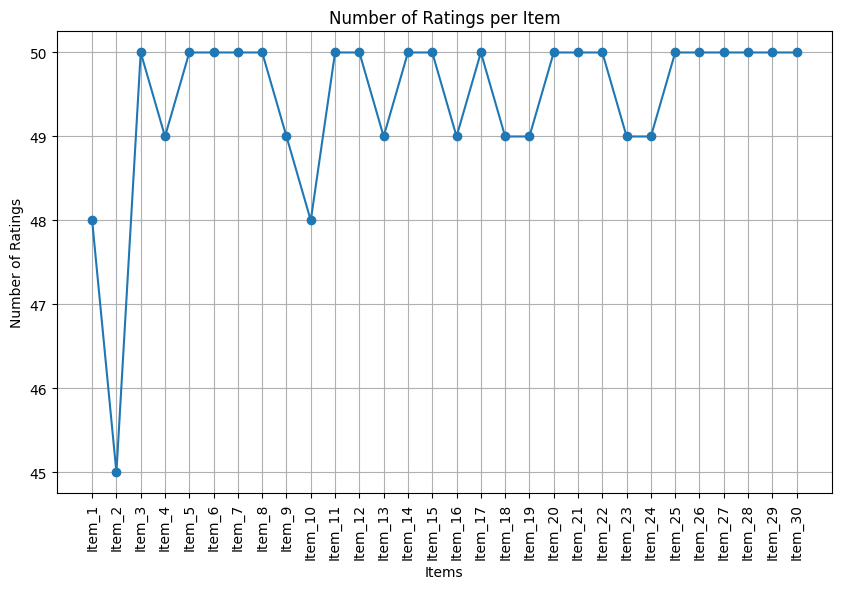

Threshold β for each active user:
[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]


In [ ]:
#Mohamed Ayman Mohamed Abdelwahab
#A20000763

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "ratings_dataset.csv"
data = pd.read_csv(file_path)

tnu = len(data)
print(f"Total number of users (tnu): {tnu}")
tni = len(data.columns) - 1
print(f"Total number of items (tni): {tni}")

ratings_per_item = data.iloc[:, 1:].notnull().sum()
print("Number of ratings per item:")
print(ratings_per_item)

def co_rating_stats(active_user_index, data):
    active_user_ratings = data.iloc[active_user_index, 1:]
    co_rated_users = data.iloc[:, 1:].apply(
        lambda row: (row.notnull() & active_user_ratings.notnull()).sum(), axis=1
    )
    co_rated_items = active_user_ratings.notnull().sum()
    return co_rated_users, co_rated_items

active_user_index = 0
No_common_users, No_coRated_items = co_rating_stats(active_user_index, data)
print(f"No_common_users: {No_common_users.tolist()}")
print(f"No_coRated_items: {No_coRated_items}")

No_common_users_array = No_common_users.to_numpy()

No_coRated_items_array = np.full_like(No_common_users_array, No_coRated_items)

co_rating_array = np.column_stack((No_common_users_array, No_coRated_items_array))

co_rating_array_sorted = co_rating_array[co_rating_array[:, 0].argsort()[::-1]]
print("2-D array with No_common_users and No_coRated_items (sorted):")
print(co_rating_array_sorted)

plt.figure(figsize=(10, 6))
plt.plot(ratings_per_item.index, ratings_per_item.values, marker='o')
plt.title("Number of Ratings per Item")
plt.xlabel("Items")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=90)
plt.grid()
plt.show()

def find_threshold_beta(active_user_index, data):
    active_user_ratings = data.iloc[active_user_index, 1:]
    threshold = int(0.3 * len(active_user_ratings))
    co_ratings = data.iloc[:, 1:].apply(
        lambda row: (row.notnull() & active_user_ratings.notnull()).sum(), axis=1
    )
    max_users = (co_ratings >= threshold).sum()
    return max_users

thresholds = [find_threshold_beta(i, data) for i in range(tnu)]
print("Threshold β for each active user:")
print(thresholds)

Case Study 1.1

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd


file_path = "ratings_dataset.csv"
data = pd.read_csv(file_path).fillna(0)


user_ratings = data.iloc[:, 1:].to_numpy()


cosine_sim_matrix = cosine_similarity(user_ratings)
np.fill_diagonal(cosine_sim_matrix, 0)
print("Cosine Similarity Matrix:")
print(cosine_sim_matrix)

Cosine Similarity Matrix:
[[0.         0.78858076 0.63765166 ... 0.80403513 0.79732587 0.80286787]
 [0.78858076 0.         0.69799933 ... 0.76910673 0.80180118 0.77337958]
 [0.63765166 0.69799933 0.         ... 0.67250695 0.66722566 0.71871251]
 ...
 [0.80403513 0.76910673 0.67250695 ... 0.         0.82424316 0.85319869]
 [0.79732587 0.80180118 0.66722566 ... 0.82424316 0.         0.80860714]
 [0.80286787 0.77337958 0.71871251 ... 0.85319869 0.80860714 0.        ]]


In [ ]:
def get_top_k_users(similarity_matrix, k_percent):
    num_users = similarity_matrix.shape[0]
    k = int(num_users * k_percent)
    top_k_users = np.argsort(-similarity_matrix, axis=1)[:, :k]
    return top_k_users

top_20_percent_users = get_top_k_users(cosine_sim_matrix, 0.2)
print("Top 20% Closest Users for Each User:")
print(top_20_percent_users)

Top 20% Closest Users for Each User:
[[32 15 26 46  8 45 30 28  5  4]
 [ 7 43 40 20 46 32 15  6 34 30]
 [13 39 37 23  7 15 29 12 44 36]
 [30 18 48 24 20  4 40 37 47 22]
 [32 48 12 40 43 30 18 11 47 15]
 [48 37 15 17  0  9 32 26 18  4]
 [41 28 40 19 49  4  9 43 32 33]
 [37 13 38 20 15 40  1 18 17 30]
 [27 42 45 25 37  9 20 32 15 40]
 [41 49 18 48 32 27  6 28 12  4]
 [11 38 32 49 12 17 35 28 25 29]
 [17 32 10 49 38 26 12  4  9 44]
 [ 4 43 10 11 15 32 29 24 48  9]
 [40 37  7 18 19 28 33 30  4  9]
 [17 47 43 32 45 37 40 27 33 48]
 [47 20  0  7 12 48 30 24  4 40]
 [32 39 34 49 37 31 19 26 44  4]
 [11 37 32 14 36 43 47 26 44 30]
 [37 48  3  9 13  4 28 34  7 19]
 [28 40 33 49 32  6 13 30 17 36]
 [22 30 47 15  7  3 39  8 37 41]
 [32 45  4 14 42 26 37 39 12 24]
 [20 24 23 30 48 32 25  3 43 47]
 [40 27 12 22 32  3 15 28 35 29]
 [29 44 30  3 48 15  4 12 49 22]
 [37  8 32 45 31  9 39 27 22  3]
 [30 32 17 31 11  0 36 37 24 28]
 [ 8 45  9 23 14 32 35 41 29 49]
 [38 19  6 35 18 40 32 13 17  9]
 [24 1

In [ ]:
def predict_ratings(user_ratings, similarity_matrix, top_k_users):
    num_users, num_items = user_ratings.shape
    predictions = np.zeros_like(user_ratings)

    for user in range(num_users):
        similar_users = top_k_users[user]
        sim_scores = similarity_matrix[user, similar_users]
        for item in range(num_items):
            if user_ratings[user, item] == 0:
                weighted_sum = np.dot(sim_scores, user_ratings[similar_users, item])
                sim_sum = np.sum(sim_scores)
                predictions[user, item] = weighted_sum / (sim_sum + 1e-8)
    return predictions

predictions = predict_ratings(user_ratings, cosine_sim_matrix, top_20_percent_users)
print("Predicted Ratings for Unseen Items:")
print(predictions)

Predicted Ratings for Unseen Items:
[[0.         1.70978301 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [2.19202255 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:

def compute_discount_factor(similarity_matrix, threshold_beta):
    num_users = similarity_matrix.shape[0]
    df_matrix = np.zeros_like(similarity_matrix)
    for i in range(num_users):
        threshold = threshold_beta[i]
        df_matrix[i] = np.where(similarity_matrix[i] >= threshold, 1, similarity_matrix[i] / threshold)
    return df_matrix


threshold_beta = [0.3] * user_ratings.shape[0]
df_matrix = compute_discount_factor(cosine_sim_matrix, threshold_beta)


discounted_similarity_matrix = cosine_sim_matrix * df_matrix
print("Discounted Similarity Matrix:")
print(discounted_similarity_matrix)

Discounted Similarity Matrix:
[[0.         0.78858076 0.63765166 ... 0.80403513 0.79732587 0.80286787]
 [0.78858076 0.         0.69799933 ... 0.76910673 0.80180118 0.77337958]
 [0.63765166 0.69799933 0.         ... 0.67250695 0.66722566 0.71871251]
 ...
 [0.80403513 0.76910673 0.67250695 ... 0.         0.82424316 0.85319869]
 [0.79732587 0.80180118 0.66722566 ... 0.82424316 0.         0.80860714]
 [0.80286787 0.77337958 0.71871251 ... 0.85319869 0.80860714 0.        ]]


In [ ]:
top_20_percent_users_ds = get_top_k_users(discounted_similarity_matrix, 0.2)
print("Top 20% Closest Users Using Discounted Similarity:")
print(top_20_percent_users_ds)

Top 20% Closest Users Using Discounted Similarity:
[[32 15 26 46  8 45 30 28  5  4]
 [ 7 43 40 20 46 32 15  6 34 30]
 [13 39 37 23  7 15 29 12 44 36]
 [30 18 48 24 20  4 40 37 47 22]
 [32 48 12 40 43 30 18 11 47 15]
 [48 37 15 17  0  9 32 26 18  4]
 [41 28 40 19 49  4  9 43 32 33]
 [37 13 38 20 15 40  1 18 17 30]
 [27 42 45 25 37  9 20 32 15 40]
 [41 49 18 48 32 27  6 28 12  4]
 [11 38 32 49 12 17 35 28 25 29]
 [17 32 10 49 38 26 12  4  9 44]
 [ 4 43 10 11 15 32 29 24 48  9]
 [40 37  7 18 19 28 33 30  4  9]
 [17 47 43 32 45 37 40 27 33 48]
 [47 20  0  7 12 48 30 24  4 40]
 [32 39 34 49 37 31 19 26 44  4]
 [11 37 32 14 36 43 47 26 44 30]
 [37 48  3  9 13  4 28 34  7 19]
 [28 40 33 49 32  6 13 30 17 36]
 [22 30 47 15  7  3 39  8 37 41]
 [32 45  4 14 42 26 37 39 12 24]
 [20 24 23 30 48 32 25  3 43 47]
 [40 27 12 22 32  3 15 28 35 29]
 [29 44 30  3 48 15  4 12 49 22]
 [37  8 32 45 31  9 39 27 22  3]
 [30 32 17 31 11  0 36 37 24 28]
 [ 8 45  9 23 14 32 35 41 29 49]
 [38 19  6 35 18 40 32 13

In [ ]:
predictions_ds = predict_ratings(user_ratings, discounted_similarity_matrix, top_20_percent_users_ds)
print("Predicted Ratings for Unseen Items Using Discounted Similarity:")
print(predictions_ds)

Predicted Ratings for Unseen Items Using Discounted Similarity:
[[0.         1.70978301 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [2.19202255 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


Case Study 1.2

In [ ]:

def mean_center_user_ratings(ratings):
    user_means = np.mean(ratings, axis=1, where=(ratings != 0))
    mean_centered_ratings = ratings - user_means[:, None]
    mean_centered_ratings[ratings == 0] = 0
    return mean_centered_ratings, user_means

mean_centered_ratings, user_means = mean_center_user_ratings(user_ratings)

cosine_sim_matrix_mean_centered = cosine_similarity(mean_centered_ratings)
np.fill_diagonal(cosine_sim_matrix_mean_centered, 0)
print("Cosine Similarity Matrix (Mean-Centered):")
print(cosine_sim_matrix_mean_centered)

Cosine Similarity Matrix (Mean-Centered):
[[ 0.          0.03548131 -0.07121681 ... -0.05434561  0.03970026
  -0.16198262]
 [ 0.03548131  0.          0.07044434 ... -0.10924063  0.30645485
  -0.11293431]
 [-0.07121681  0.07044434  0.         ... -0.05201892 -0.42625794
   0.02246415]
 ...
 [-0.05434561 -0.10924063 -0.05201892 ...  0.          0.02542957
   0.11917944]
 [ 0.03970026  0.30645485 -0.42625794 ...  0.02542957  0.
  -0.15284538]
 [-0.16198262 -0.11293431  0.02246415 ...  0.11917944 -0.15284538
   0.        ]]


In [ ]:
top_20_percent_users_mc = get_top_k_users(cosine_sim_matrix_mean_centered, 0.2)
print("Top 20% Closest Users (Mean-Centered):")
print(top_20_percent_users_mc)

Top 20% Closest Users (Mean-Centered):
[[46 15  8 32 10 29 28  5 21  3]
 [ 5  7 35 48 42 46 40 20 38 15]
 [39 13 16 44 21 37 20 29  7 31]
 [30 48 18 24 22 20 44 29 47 25]
 [12 43 29 21 24 48 11 44 15 40]
 [48 37  1 15 35 17 26  9 21 18]
 [41 28 19 49 40 22  9  8 33 43]
 [20 38 13  1 37 15 18 42  5 40]
 [27 42 46 25  0 45 39  9  6 22]
 [41 18 48 27 49  5  8  6 11 22]
 [11 38 49 12 32 35 16  0 28 29]
 [10 38 17 49 32 26 12 44  4 29]
 [ 4 10 11 29 43 48 15 24 23 38]
 [ 2  7 40 18 37 19 33  3 28 44]
 [47 43 17 45 37 21 27 32 40 35]
 [20 47  0  5  7 48  4 24 38 12]
 [39 34 32  2 31 44 37 49 10 19]
 [11 36 14 44 37 26 38 43 47  5]
 [ 3  9 48 37 34 42 13 28  7  5]
 [33 28 40 49  6 38 36 13 16 18]
 [22  7 15 47 30  1  3  2 41 39]
 [42 45 32  4 14  2  5 26 39 44]
 [20 48 24 23  3 25 30  6 41 47]
 [22 27 48 35  4  3 40 29 12 20]
 [29 44  3 22 48 30  4 41 26 15]
 [37 39 31  8 22 35 27 45  3 10]
 [30 31 11 17 32 36  5 21 24 33]
 [ 8 35  9 45 23 29 41 14 42 25]
 [38 19 35  6 18 10 48 42  0 41]
 [24

In [ ]:
def predict_ratings_mean_centered(ratings, similarity_matrix, top_k_users, user_means):
    num_users, num_items = ratings.shape
    predictions = np.zeros_like(ratings)

    for user in range(num_users):
        similar_users = top_k_users[user]
        sim_scores = similarity_matrix[user, similar_users]
        for item in range(num_items):
            if ratings[user, item] == 0:
                weighted_sum = np.dot(sim_scores, ratings[similar_users, item])
                sim_sum = np.sum(sim_scores)
                predictions[user, item] = user_means[user] + (weighted_sum / (sim_sum + 1e-8))
    return predictions

predictions_mc = predict_ratings_mean_centered(user_ratings, cosine_sim_matrix_mean_centered, top_20_percent_users_mc, user_means)
print("Predicted Ratings (Mean-Centered):")
print(predictions_mc)

Predicted Ratings (Mean-Centered):
[[0.         5.9182956  0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [6.25249511 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
df_matrix_mc = compute_discount_factor(cosine_sim_matrix_mean_centered, threshold_beta)
discounted_similarity_matrix_mc = cosine_sim_matrix_mean_centered * df_matrix_mc
print("Discounted Similarity Matrix (Mean-Centered):")
print(discounted_similarity_matrix_mc)

Discounted Similarity Matrix (Mean-Centered):
[[0.         0.00419641 0.01690611 ... 0.00984482 0.0052537  0.08746123]
 [0.00419641 0.         0.01654135 ... 0.03977838 0.30645485 0.04251386]
 [0.01690611 0.01654135 0.         ... 0.00901989 0.60565278 0.00168213]
 ...
 [0.00984482 0.03977838 0.00901989 ... 0.         0.00215554 0.04734579]
 [0.0052537  0.30645485 0.60565278 ... 0.00215554 0.         0.07787237]
 [0.08746123 0.04251386 0.00168213 ... 0.04734579 0.07787237 0.        ]]


In [ ]:
top_20_percent_users_ds_mc = get_top_k_users(discounted_similarity_matrix_mc, 0.2)
print("Top 20% Closest Users Using Discounted Similarity (Mean-Centered):")
print(top_20_percent_users_ds_mc)

Top 20% Closest Users Using Discounted Similarity (Mean-Centered):
[[41 46 36 15  8 32 10  9 29 44]
 [11  9  5  7 35 48 27 36 17 42]
 [48 43 39 13 22 32 16  3 19 14]
 [30 48 18 16  2 24 10 43 11 22]
 [31 36 12 25 35 43 29 21 24 48]
 [48 37  1 27 29 33 15 10 23 35]
 [21 41 28 19 49 23 40 29 22  9]
 [27 32 45 14 20 38 13  1 37 34]
 [36 17 44 27 42 46 25  0 45 30]
 [ 1 33 41 18 48 27 49 39  0 30]
 [11 38 30 49 12 32 35  3 13 40]
 [10  1 38 17 23 49 32 26 40  3]
 [ 4 31 37 10 36 11 29 43 48 19]
 [32 35 21  2 22  7 40 10 11 18]
 [ 7 20 47 43 17 45 37 21 27  2]
 [25 45 20 33 47 32  0 34 36  5]
 [48 40 22 39 34 32  3  2 23 31]
 [ 8 11 36 14 44 23 37 42 26 38]
 [ 3  9 48 37 34 42 10 43 13 28]
 [22 24 33 29 23 28 40 49  2  6]
 [14 22 21  7 45 15 47 28 29 32]
 [ 6 13 20 41 46 42 45 32  7  4]
 [19 16 20 48  2 44 13 24 49 23]
 [49 37 11 44 19 33 38 17 16 22]
 [29 19 44 35  3 22 48 30 37 46]
 [15  4 37 39 31  8 19 47 43 30]
 [27 30 31 11 17 32 34 36 23  5]
 [44  7 30 26  8  5  1 35  9 45]
 [38 20 4

In [ ]:
predictions_ds_mc = predict_ratings_mean_centered(user_ratings, discounted_similarity_matrix_mc, top_20_percent_users_ds_mc, user_means)
print("Predicted Ratings Using Discounted Similarity (Mean-Centered):")
print(predictions_ds_mc)

Predicted Ratings Using Discounted Similarity (Mean-Centered):
[[0.         5.77950325 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [5.36502973 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
comparison_users = top_20_percent_users_mc == top_20_percent_users_ds_mc
print("Comparison of Top 20% Closest Users (Cosine vs Discounted Similarity):")
print(comparison_users)

similarity_difference = np.sum(comparison_users) / top_20_percent_users_mc.size * 100
print(f"Percentage of Similarity Between the Two Methods: {similarity_difference:.2f}%")

Comparison of Top 20% Closest Users (Cosine vs Discounted Similarity):
[[False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [ True  True  True False False False False False False False]
 [False False False False False False False False False False]
 [ True  True  True False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [ True  True False False False False False False False False]
 [ True False False False False False False False False False]
 [ True False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False Fal

In [ ]:
rating_diff = np.abs(predictions_mc - predictions_ds_mc)
print("Difference in Predicted Ratings (Cosine vs Discounted Similarity):")
print(rating_diff)

avg_diff = np.mean(rating_diff)
print(f"Average Difference in Predicted Ratings: {avg_diff:.2f}")

Difference in Predicted Ratings (Cosine vs Discounted Similarity):
[[0.         0.13879235 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.88746538 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Average Difference in Predicted Ratings: 0.00


Case Study 1.3

In [ ]:
from scipy.stats import pearsonr

def compute_pcc(ratings):
    num_users = ratings.shape[0]
    pcc_matrix = np.zeros((num_users, num_users))

    for i in range(num_users):
        for j in range(i + 1, num_users):

            common_items = (ratings[i] != 0) & (ratings[j] != 0)
            if np.any(common_items):
                pcc, _ = pearsonr(ratings[i, common_items], ratings[j, common_items])
                pcc_matrix[i, j] = pcc
                pcc_matrix[j, i] = pcc


    np.fill_diagonal(pcc_matrix, 0)
    return pcc_matrix

pcc_matrix = compute_pcc(user_ratings)
print("Pearson Correlation Coefficient (PCC) Matrix:")
print(pcc_matrix)

Pearson Correlation Coefficient (PCC) Matrix:
[[ 0.          0.04882407 -0.09459328 ... -0.05528403  0.04335078
  -0.17708823]
 [ 0.04882407  0.          0.08360701 ... -0.11367868  0.32036164
  -0.11571218]
 [-0.09459328  0.08360701  0.         ... -0.05861644 -0.45040088
   0.0253049 ]
 ...
 [-0.05528403 -0.11367868 -0.05861644 ...  0.          0.02543545
   0.11917944]
 [ 0.04335078  0.32036164 -0.45040088 ...  0.02543545  0.
  -0.15472964]
 [-0.17708823 -0.11571218  0.0253049  ...  0.11917944 -0.15472964
   0.        ]]


In [ ]:
top_20_percent_users_pcc = get_top_k_users(pcc_matrix, 0.2)
print("Top 20% Closest Users Using PCC:")
print(top_20_percent_users_pcc)

Top 20% Closest Users Using PCC:
[[46 15  8 32 10 29 28  5 21  3]
 [ 5  7 35 48 42 46 20 40 38 15]
 [13 39 16 44 21 37 20 29  7 31]
 [30 48 18 24 22 20 44 29 47 25]
 [12 43 29 21 11 24 48 44 15 40]
 [48  1 37 15 35 17 26  9 21 18]
 [41 28 19 49 40 22  9  8 33 43]
 [20 38  1 13 37 15 18 42  5 40]
 [27 42 46  0 25 45 39  9  6 22]
 [41 18 48 27 49  5  8  6 11 22]
 [11 38 49 12 32 35 16  0 28 29]
 [10 38 17 49 32 26 12 44  4 29]
 [ 4 10 11 29 48 43 15 24 23 38]
 [ 2  7 40 18 37 19 33  3 28 44]
 [47 43 17 45 37 21 27 32 40 35]
 [20 47  0  5  7 48  4 24 38 12]
 [39 34  2 32 31 10 37 44 49 19]
 [11 36 14 44 37 26 38 43 47  5]
 [ 3 48  9 37 34 42 13 28  7  5]
 [33 28 40 49  6 38 36 13 16 18]
 [22  7 15 47 30  2  1  3 41 39]
 [42 45 32  4  2 14  5 26 39 44]
 [20 48 24 23  3 25 30  6 41 47]
 [22 27 48  4 35  3 40 29 12 20]
 [29 44  3 22 48 30  4 41 26 15]
 [37 39 31  8 22 35 27 45  3 10]
 [30 31 11 17 32 36  5 21 24 16]
 [ 8 35  9 45 23 29 41 14 42 25]
 [38 19 35  6 18 10 48  0 42 41]
 [24  4 27

In [ ]:
predictions_pcc = predict_ratings_mean_centered(user_ratings, pcc_matrix, top_20_percent_users_pcc, user_means)
print("Predicted Ratings Using PCC:")
print(predictions_pcc)

Predicted Ratings Using PCC:
[[0.         5.94705543 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [6.25398983 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
df_matrix_pcc = compute_discount_factor(pcc_matrix, threshold_beta)
discounted_similarity_matrix_pcc = pcc_matrix * df_matrix_pcc
print("Discounted Similarity Matrix (PCC):")
print(discounted_similarity_matrix_pcc)

Discounted Similarity Matrix (PCC):
[[0.         0.00794597 0.0298263  ... 0.01018775 0.0062643  0.10453414]
 [0.00794597 0.         0.02330044 ... 0.04307614 0.32036164 0.04463103]
 [0.0298263  0.02330044 0.         ... 0.01145296 0.67620316 0.00213446]
 ...
 [0.01018775 0.04307614 0.01145296 ... 0.         0.00215654 0.04734579]
 [0.0062643  0.32036164 0.67620316 ... 0.00215654 0.         0.0798042 ]
 [0.10453414 0.04463103 0.00213446 ... 0.04734579 0.0798042  0.        ]]


In [ ]:
top_20_percent_users_ds_pcc = get_top_k_users(discounted_similarity_matrix_pcc, 0.2)
print("Top 20% Closest Users Using Discounted Similarity (PCC):")
print(top_20_percent_users_ds_pcc)

Top 20% Closest Users Using Discounted Similarity (PCC):
[[41 46 36 15  8 32 10  9 29 44]
 [11  9  5  7 35 27 36 48 17 42]
 [48 13 32 22 39 43  3 16 19 40]
 [ 2 30 48 18 16 24 10 43 11 22]
 [31 36 12 35 25 43 29 21 11 24]
 [48  1 37 27 29 33 15 10 23 35]
 [21 41 28 19 49 23 40 29 22  9]
 [27 32 45 14 20 38  1 13 37 34]
 [36 17 44 27 42 46  0 25 45 30]
 [ 1 33 41 18 48 27 49 39  0 30]
 [11 38 30 49 12 32 35  3 13 16]
 [ 1 10 38 17 23 49 32 26 40  3]
 [ 4 31 37 10 36 11 29 48 43 19]
 [32 35  2 21 22  7 40 10 11 18]
 [ 7 20 47 43 17 45 37  2 21 27]
 [25 45 20 33 47 32  0 34 36  5]
 [48 40 22 39 34  2  3 32 23 31]
 [ 8 11 36 14 44 23 37 42 26 38]
 [ 3 48  9 37 34 42 10 43 13 28]
 [22 24 33 29 23 28 40  2 49  6]
 [14 22 21 45  7 15 28 47 32 29]
 [ 6 20 13 41 46 42 45 32  4  7]
 [19 16 20  2 48 44 13 24 49 23]
 [49 37 11 44 19 33 16 38 17 22]
 [29 19 44 35  3 22 48 30 37 46]
 [15  4 37 39 31  8 19 47 43 30]
 [27 30 31 11 17 32 34 36 23  5]
 [44  7 30 26  8  1  5 35  9 45]
 [38 20 47 19 35  6

In [ ]:
predictions_ds_pcc = predict_ratings_mean_centered(user_ratings, discounted_similarity_matrix_pcc, top_20_percent_users_ds_pcc, user_means)
print("Predicted Ratings Using Discounted Similarity (PCC):")
print(predictions_ds_pcc)

Predicted Ratings Using Discounted Similarity (PCC):
[[0.         5.80546356 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [5.3542477  0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
comparison_users_pcc = top_20_percent_users_pcc == top_20_percent_users_ds_pcc
print("Comparison of Top 20% Closest Users (PCC vs Discounted PCC):")
print(comparison_users_pcc)

similarity_difference_pcc = np.sum(comparison_users_pcc) / top_20_percent_users_pcc.size * 100
print(f"Percentage of Similarity Between the Two Methods (PCC): {similarity_difference_pcc:.2f}%")

Comparison of Top 20% Closest Users (PCC vs Discounted PCC):
[[False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [ True  True  True False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [ True  True False False False False False False False False]
 [False False False False False False False False False False]
 [ True False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False F

In [ ]:
rating_diff_pcc = np.abs(predictions_pcc - predictions_ds_pcc)
print("Difference in Predicted Ratings (PCC vs Discounted PCC):")
print(rating_diff_pcc)

avg_diff_pcc = np.mean(rating_diff_pcc)
print(f"Average Difference in Predicted Ratings (PCC): {avg_diff_pcc:.2f}")

Difference in Predicted Ratings (PCC vs Discounted PCC):
[[0.         0.14159188 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.89974213 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Average Difference in Predicted Ratings (PCC): 0.00
